In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']
df = pd.read_csv("Desktop/trainingandtestdata/training.1600000.processed.noemoticon.csv", header=None, names=cols,
                 encoding='latin-1')
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [9]:
df.where(df.query_string == "NO_QUERY").count()

sentiment       1600000
id              1600000
date            1600000
query_string    1600000
user            1600000
text            1600000
dtype: int64

In [11]:
df.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)

In [12]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [13]:
df[df['sentiment'] == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [14]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [15]:
df[df['sentiment'] == 4].head(10)

,sentiment,text,pre_clean_len
800000,4,I LOVE @Health4UandPets u guys r the best!!,44
800001,4,im meeting up with one of my besties tonight! ...,72
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",137
800003,4,Being sick can be really cheap when it hurts t...,104
800004,4,@LovesBrooklyn2 he has that effect on everyone,47
800005,4,@ProductOfFear You can tell him that I just bu...,133
800006,4,@r_keith_hill Thans for your response. Ihad al...,69
800007,4,"@KeepinUpWKris I am so jealous, hope you had a...",114
800008,4,"@tommcfly ah, congrats mr fletcher for finally...",63
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,67


In [16]:
from pprint import pprint

data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


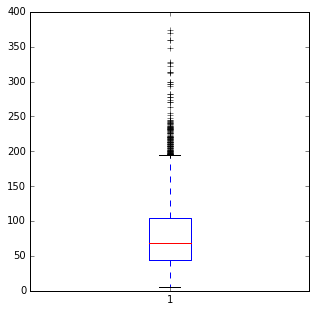

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [18]:
df[df.pre_clean_len > 140].count()

sentiment        17174
text             17174
pre_clean_len    17174
dtype: int64

In [19]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [20]:
df['text'][279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [22]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [23]:
df['text'][343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [24]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [25]:
df['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [26]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [27]:
df['text'][226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [36]:
from nltk.tokenize import WordPunctTokenizer

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [38]:
nums = [0, 1600000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[1]):
    if((i+1) % 100000 == 0):
        print("Tweets %d of %d has been processed" % (i + 1, nums[1]))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed


In [39]:
clean_df = pd.DataFrame(clean_tweet_texts, columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [47]:
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+' # handle twitter id's
pat2 = r'https?://[^ ]+' # handle urls starting with https
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'   # handle urls starting with www
# Negations are separated due to the use of tokenizer.
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [48]:
nums = [0, 1600000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[1]):
    if((i+1) % 100000 == 0):
        print("Tweets %d of %d has been processed" % (i + 1, nums[1]))                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed


In [49]:
clean_df = pd.DataFrame(clean_tweet_texts, columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()
clean_df.to_csv('clean_tweet.csv', encoding='utf-8')

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [2]:
csv = 'clean_tweet.csv'
df = pd.read_csv(csv, index_col=0)
df.head()

/home/harshit/.local/lib/python3.5/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596041 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [4]:
np.sum(df.isnull().any(axis=1))

3959

In [5]:
df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [3]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
text      1596041 non-null object
target    1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In the case of tweets, textual analysis is the most important analysis, and it provides a general idea of what kind of words are frequent in the corpus, in a sort of quick and dirty way.

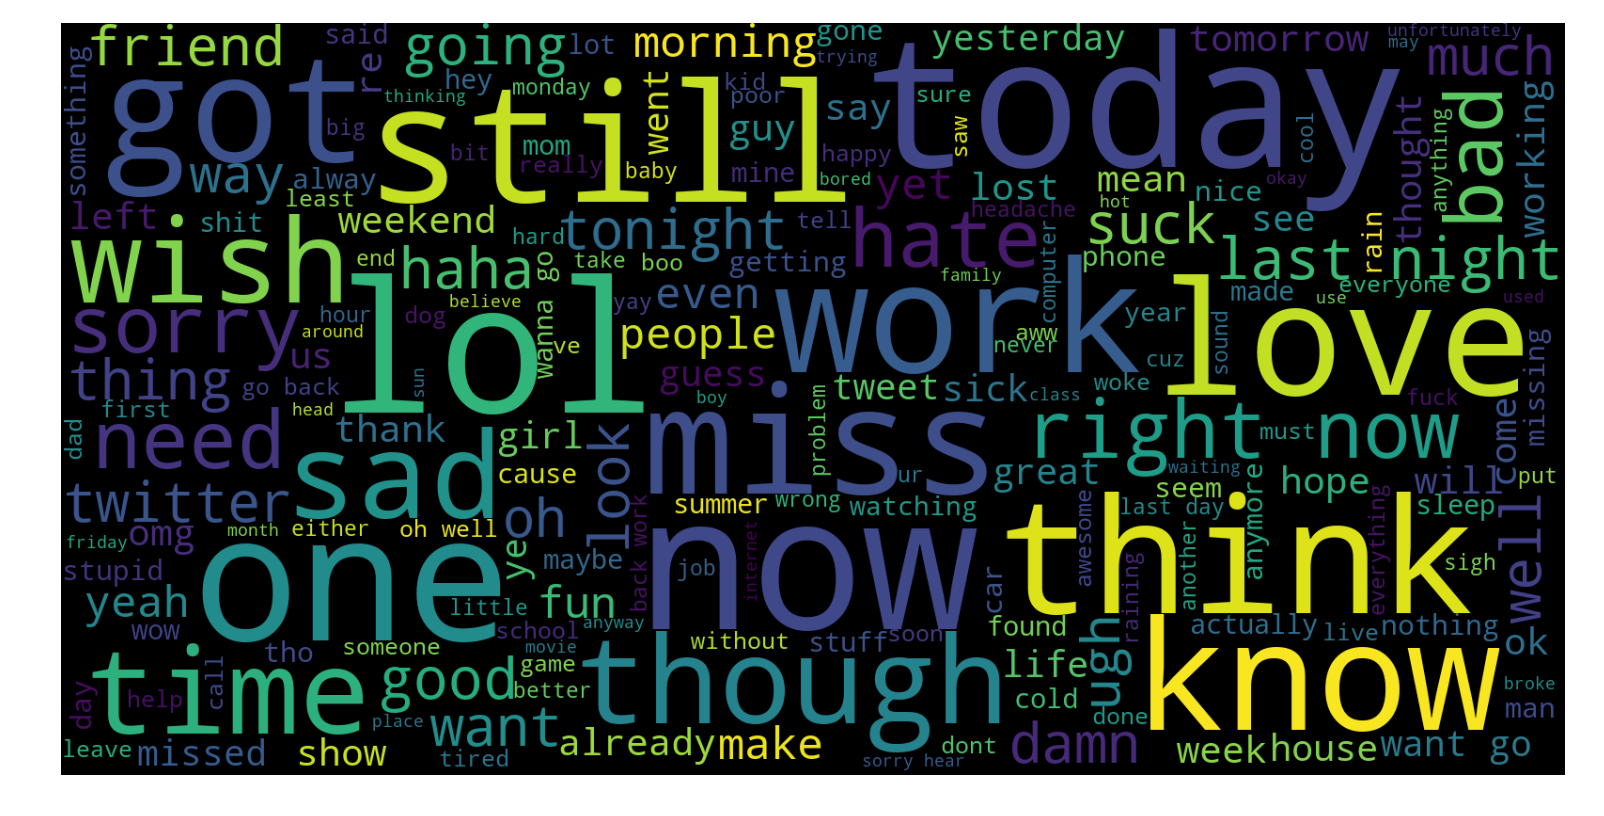

In [58]:
from wordcloud import WordCloud

neg_tweets = df[df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

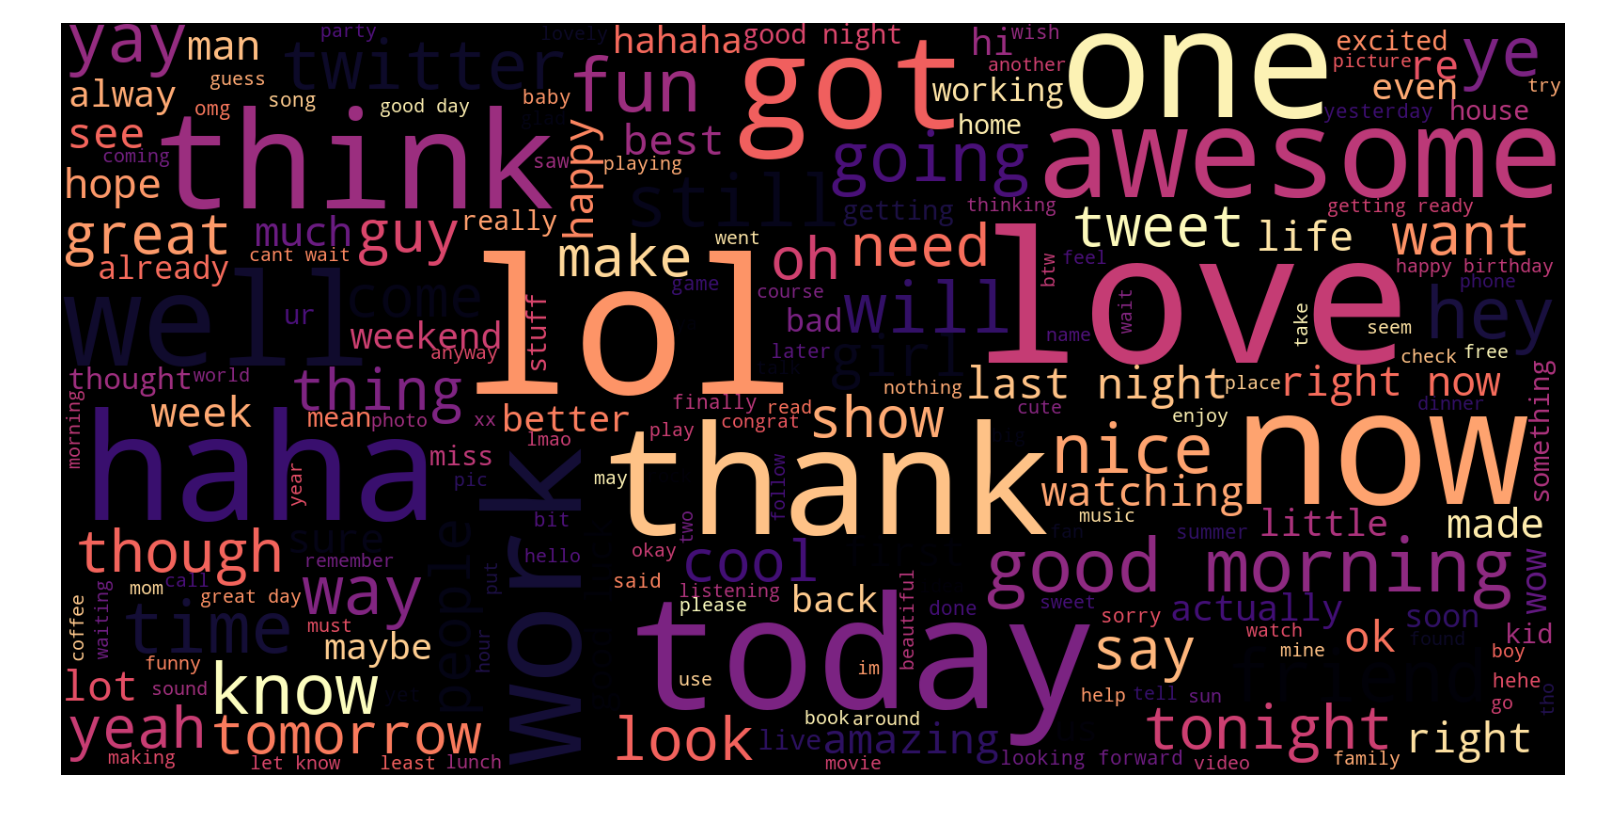

In [66]:
pos_tweets = df[df.target == 4]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
len(cvec.get_feature_names())

264939

In [10]:
neg_doc_matrix = cvec.transform(df[df.target == 0].text)
pos_doc_matrix = cvec.transform(df[df.target == 4].text)

In [11]:
print(neg_doc_matrix.shape)
print(pos_doc_matrix.shape)

(798197, 264939)
(797844, 264939)


In [12]:
neg_doc_matrix

<798197x264939 sparse matrix of type '<class 'numpy.int64'>'
	with 9250184 stored elements in Compressed Sparse Row format>

In [13]:
neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)
print(neg_tf.shape)
print(pos_tf.shape)

(1, 264939)
(1, 264939)


In [14]:
neg_tf

matrix([[160,  93,  45, ...,   0,   1,   1]], dtype=int64)

In [15]:
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
print(neg.shape)
print(pos.shape)

(264939,)
(264939,)


In [16]:
term_freq_df = pd.DataFrame([neg, pos], columns=cvec.get_feature_names()).transpose()

In [17]:
term_freq_df.head()

,0,1
aa,160,92
aaa,93,54
aaaa,45,29
aaaaa,26,12
aaaaaa,16,12


In [22]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


In [23]:
term_freq_df.head()

,negative,positive,total
aa,160,92,252
aaa,93,54,147
aaaa,45,29,74
aaaaa,26,12,38
aaaaaa,16,12,28


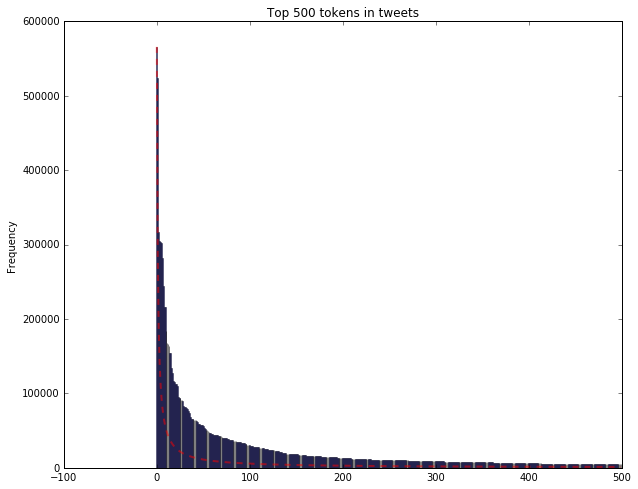

In [26]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--', linewidth=2, alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')
plt.show()

In [27]:
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
cvec = CountVectorizer(stop_words='english', max_features=10000)
cvec.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
len(cvec.get_feature_names())

10000

In [30]:
neg_doc_matrix = cvec.transform(df[df.target == 0].text)
pos_doc_matrix = cvec.transform(df[df.target == 4].text)

In [31]:
print(neg_doc_matrix.shape)
print(pos_doc_matrix.shape)

(798197, 10000)
(797844, 10000)


In [32]:
neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)
print(neg_tf.shape)
print(pos_tf.shape)

(1, 10000)
(1, 10000)


In [33]:
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df2 = pd.DataFrame([neg, pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
just,64004,62944,126948
good,29209,62118,91327
day,41374,48186,89560
like,41050,37520,78570
today,38116,30100,68216
work,45420,19529,64949
love,16990,47694,64684
going,33689,30939,64628
got,33408,28037,61445
lol,23123,36118,59241


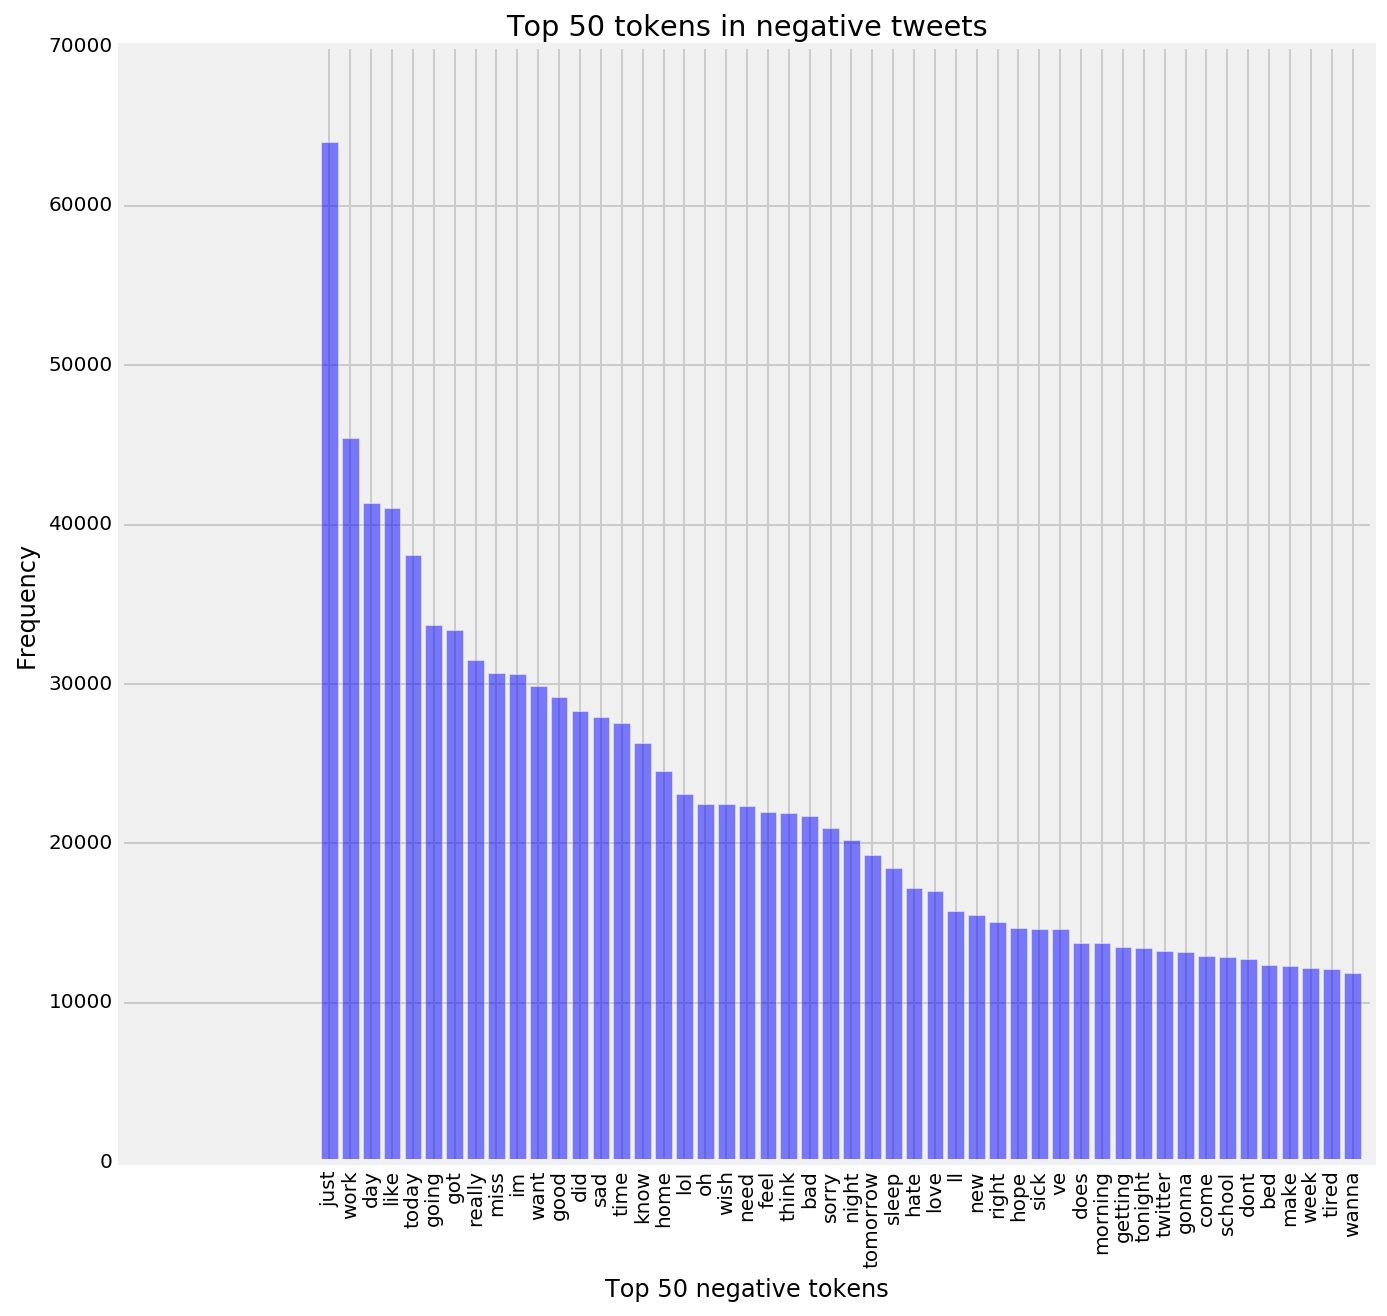

In [35]:
y_pos = np.arange(50)
plt.figure(figsize=(10, 10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

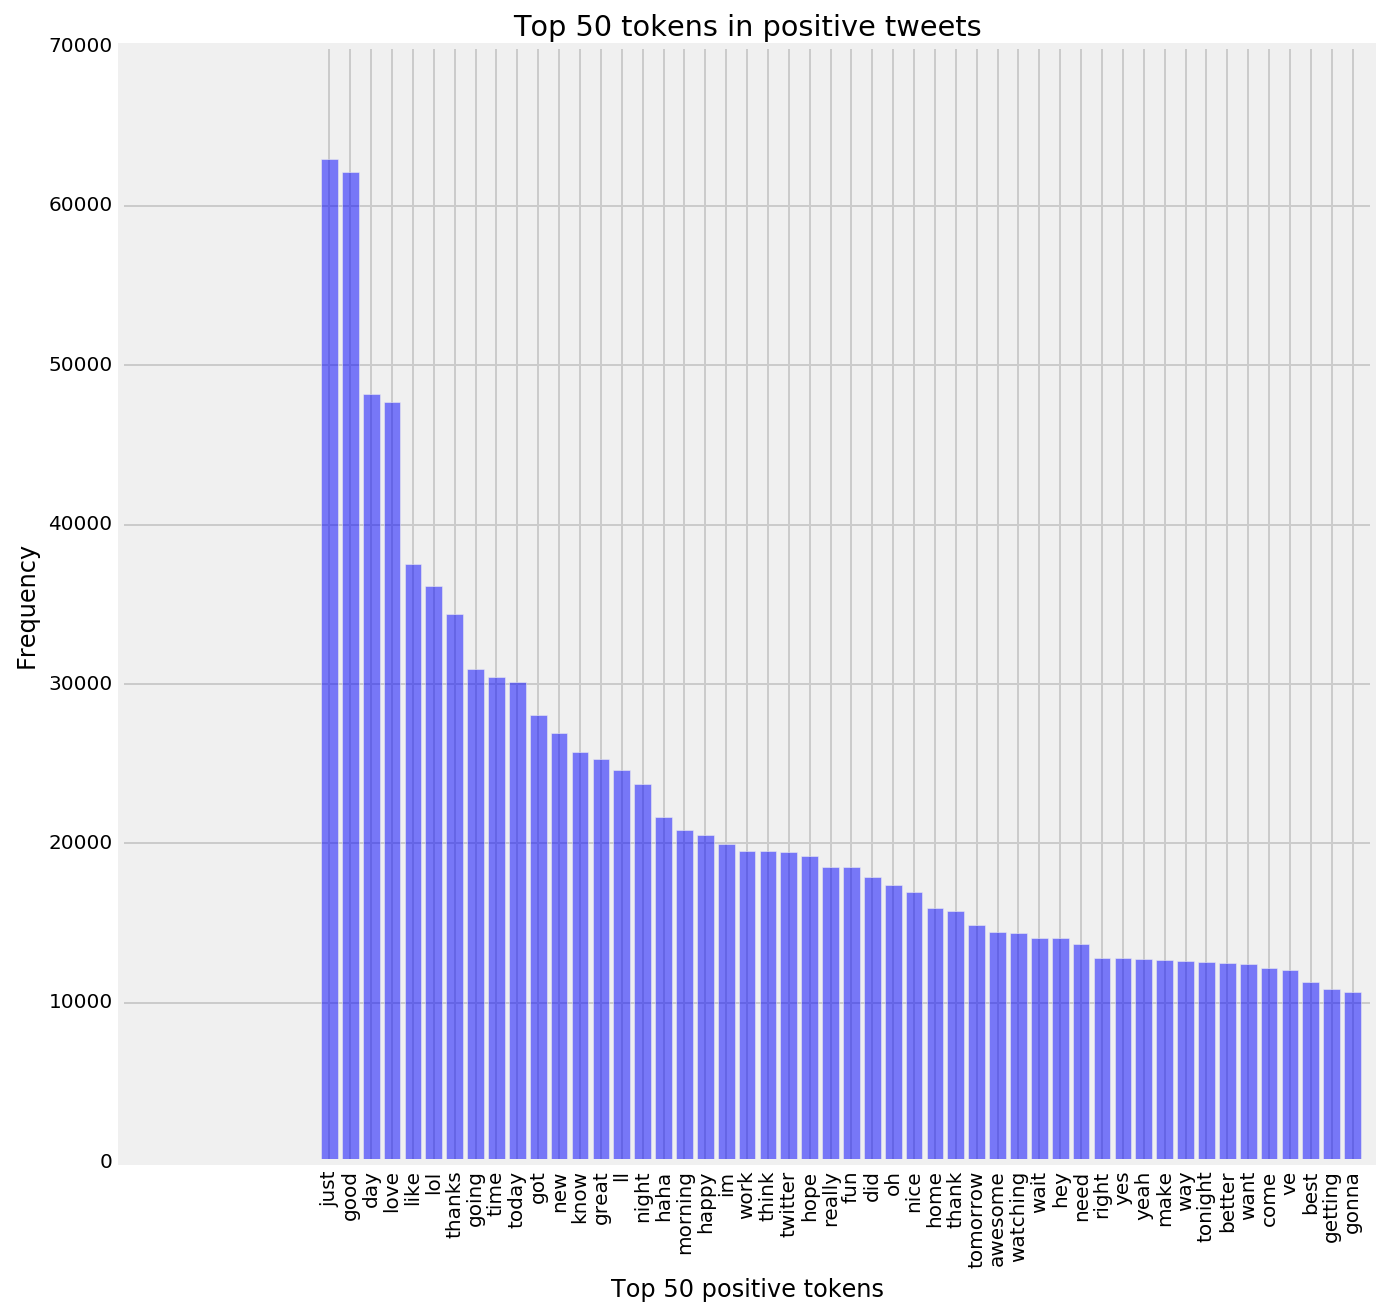

In [36]:
y_pos = np.arange(50)
plt.figure(figsize=(10, 10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

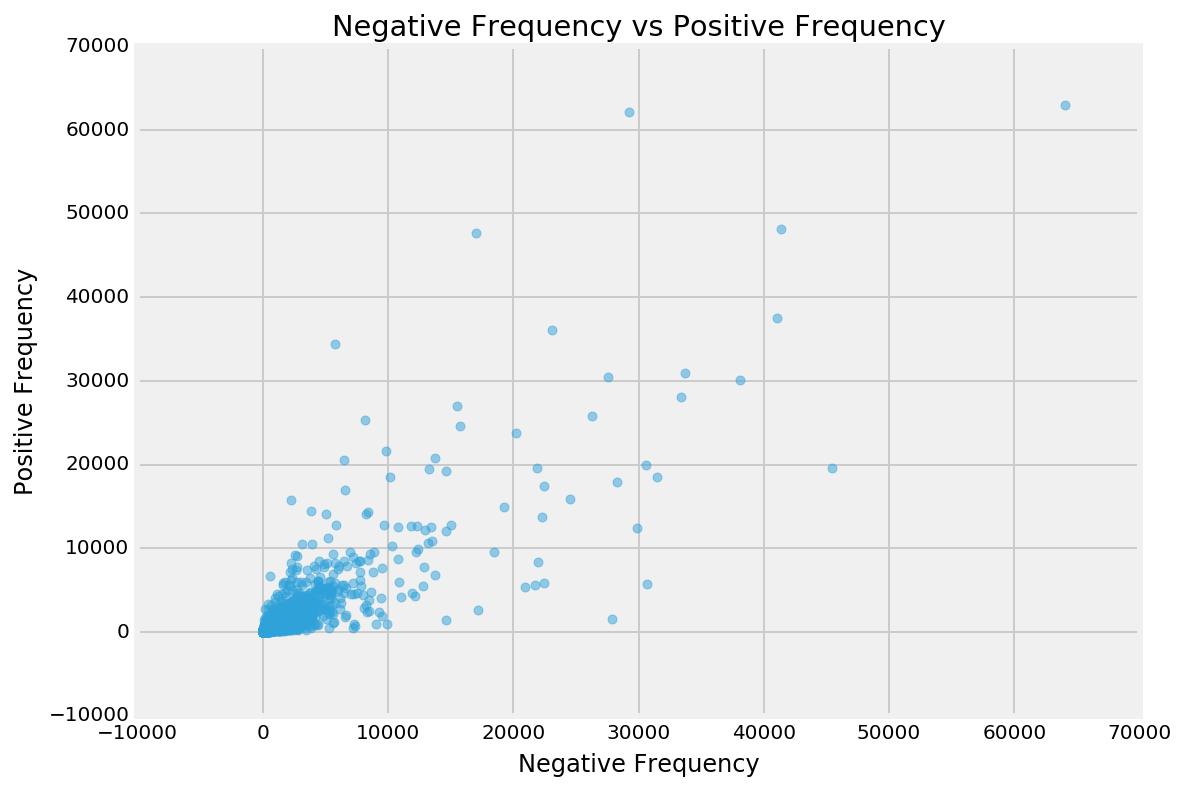

In [37]:
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive", fit_reg=False, scatter_kws={'alpha':0.5}, data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [38]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
emailunlimited,0,100,100,1.000000
dividends,0,83,83,1.000000
mileymonday,0,161,161,1.000000
shareholder,1,80,81,0.987654
fuzzball,2,99,101,0.980198
recommends,3,109,112,0.973214
delongeday,6,162,168,0.964286
atcha,3,80,83,0.963855
timestamp,3,68,71,0.957746
shaundiviney,4,89,93,0.956989


In [39]:
summ = term_freq_df2['positive'].sum()
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./summ
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
just,64004,62944,126948,0.495825,0.014396
good,29209,62118,91327,0.680171,0.014207
day,41374,48186,89560,0.538030,0.011021
love,16990,47694,64684,0.737338,0.010908
like,41050,37520,78570,0.477536,0.008581
lol,23123,36118,59241,0.609679,0.008261
thanks,5768,34375,40143,0.856314,0.007862
going,33689,30939,64628,0.478724,0.007076
time,27526,30432,57958,0.525070,0.006960
today,38116,30100,68216,0.441245,0.006884


In [40]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])                                                               if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
just,64004,62944,126948,0.495825,0.014396,0.027980
good,29209,62118,91327,0.680171,0.014207,0.027833
day,41374,48186,89560,0.538030,0.011021,0.021599
love,16990,47694,64684,0.737338,0.010908,0.021498
like,41050,37520,78570,0.477536,0.008581,0.016860
lol,23123,36118,59241,0.609679,0.008261,0.016300
thanks,5768,34375,40143,0.856314,0.007862,0.015581
going,33689,30939,64628,0.478724,0.007076,0.013946
time,27526,30432,57958,0.525070,0.006960,0.013738
today,38116,30100,68216,0.441245,0.006884,0.013557


In [41]:
from scipy.stats import norm

def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
welcome,620,6702,7322,0.915324,0.001533,0.003061,0.995623,0.999369,0.997493
thank,2282,15736,18018,0.873349,0.003599,0.007168,0.990791,1.000000,0.995374
thanks,5768,34375,40143,0.856314,0.007862,0.015581,0.987770,1.000000,0.993847
awesome,3821,14469,18290,0.791088,0.003309,0.006591,0.967038,1.000000,0.983243
glad,2273,8255,10528,0.784100,0.001888,0.003767,0.963666,0.999971,0.981483
follow,2552,9154,11706,0.781992,0.002094,0.004176,0.962596,0.999996,0.980940
enjoy,1642,5876,7518,0.781591,0.001344,0.002683,0.962389,0.997441,0.979602
sweet,1610,5646,7256,0.778115,0.001291,0.002578,0.960559,0.996331,0.978118
yay,3165,10501,13666,0.768403,0.002402,0.004788,0.955061,1.000000,0.977014
hello,1122,4524,5646,0.801275,0.001035,0.002067,0.971487,0.982293,0.976860


In [42]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
sad,27911,1510,29421,0.051324,0.000345,0.000686,0.002393,0.709591,0.004771,0.948676,0.006096,0.012114,0.997607,1.000000,0.998802
hurts,7204,456,7660,0.059530,0.000104,0.000208,0.002808,0.503854,0.005585,0.940470,0.001573,0.003141,0.997192,0.999742,0.998465
sick,14617,1419,16036,0.088488,0.000325,0.000647,0.004842,0.693343,0.009616,0.911512,0.003192,0.006362,0.995158,1.000000,0.997573
sucks,9902,982,10884,0.090224,0.000225,0.000448,0.004997,0.610419,0.009914,0.909776,0.002163,0.004315,0.995003,0.999999,0.997495
poor,7333,719,8052,0.089295,0.000164,0.000328,0.004913,0.557659,0.009741,0.910705,0.001602,0.003197,0.995087,0.999799,0.997437
ugh,9056,998,10054,0.099264,0.000228,0.000455,0.005883,0.613574,0.011655,0.900736,0.001978,0.003947,0.994117,0.999995,0.997047
missing,7282,991,8273,0.119787,0.000227,0.000452,0.008429,0.612194,0.016629,0.880213,0.001590,0.003175,0.991571,0.999778,0.995658
headache,5317,421,5738,0.073371,0.000096,0.000192,0.003657,0.496667,0.007261,0.926629,0.001161,0.002320,0.996343,0.993811,0.995075
hate,17207,2614,19821,0.131880,0.000598,0.001190,0.010345,0.868740,0.020446,0.868120,0.003758,0.007484,0.989655,1.000000,0.994801
miss,30713,5676,36389,0.155981,0.001298,0.002575,0.015317,0.996497,0.030171,0.844019,0.006708,0.013310,0.984683,1.000000,0.992282


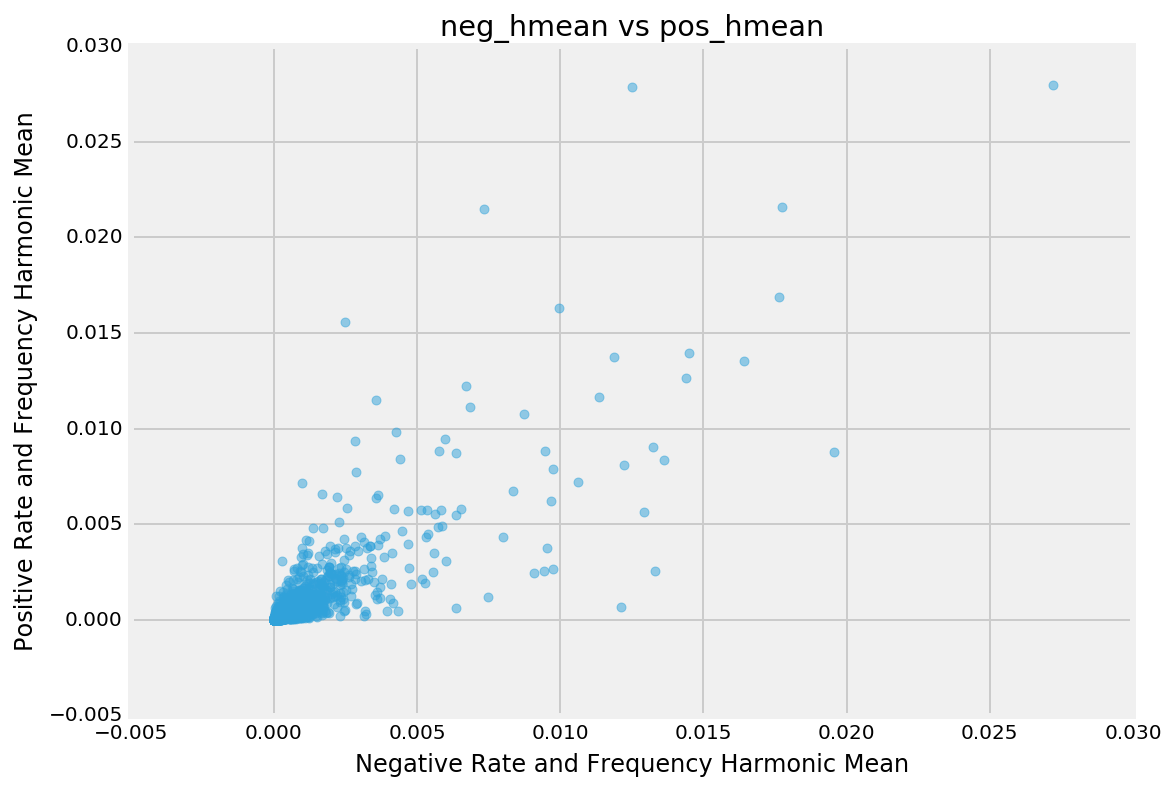

In [43]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

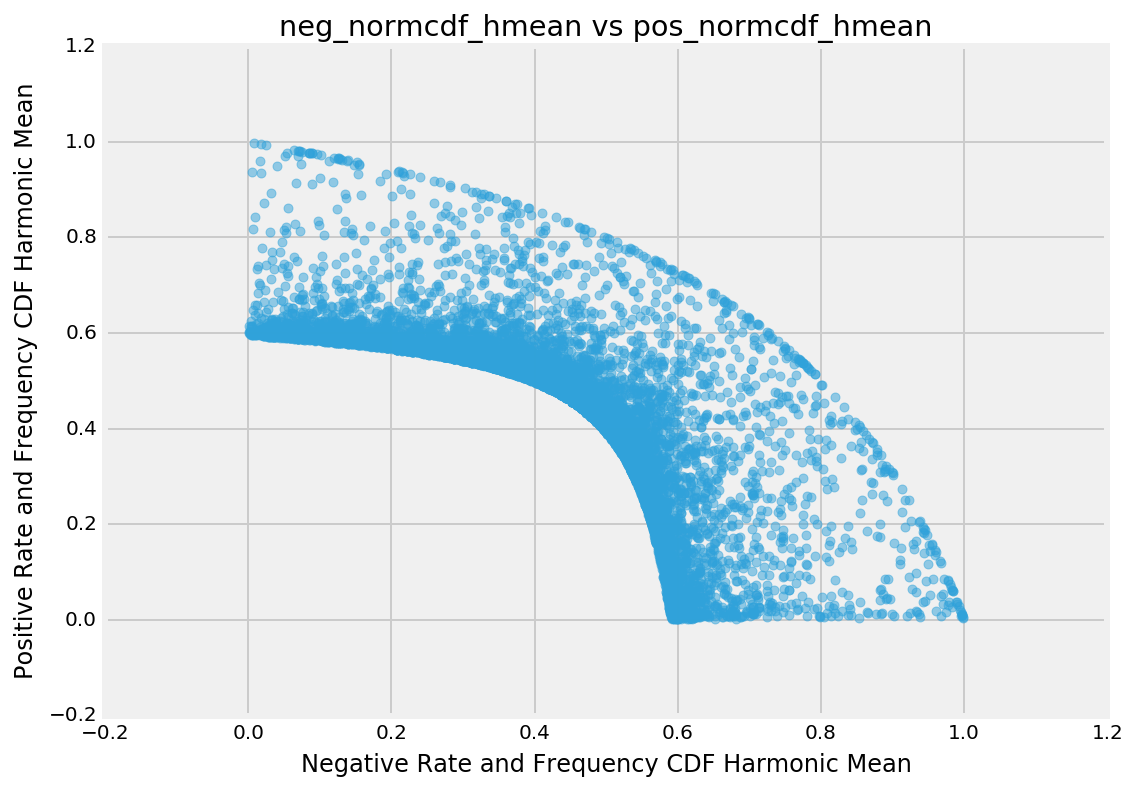

In [44]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [45]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool

# To show the visualization inline in the jupyter notebook
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean', 'pos_normcdf_hmean', source=term_freq_df2, color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token', '@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

In [48]:
term_freq_df2.to_csv('term_freq_df2.csv', encoding='utf-8')

In [51]:
term_freq_df2.head()

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
aa,160,92,252,0.365079,0.000021,0.000042,0.199162,0.429479,0.272130,0.634921,0.000035,0.000070,0.800838,0.439071,0.567178
aaa,93,54,147,0.367347,0.000012,0.000025,0.203175,0.421811,0.274251,0.632653,0.000020,0.000041,0.796825,0.425512,0.554771
aaaa,45,29,74,0.391892,0.000007,0.000013,0.249610,0.416783,0.312228,0.608108,0.000010,0.000020,0.750390,0.415851,0.535139
aaaah,76,61,137,0.445255,0.000014,0.000028,0.367093,0.423222,0.393164,0.554745,0.000017,0.000033,0.632907,0.422085,0.506432
aaaand,33,37,70,0.528571,0.000008,0.000017,0.573491,0.418391,0.483814,0.471429,0.000007,0.000014,0.426509,0.413444,0.419875


In [55]:
df.to_csv('df.csv', encoding='utf-8')

In [56]:
df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [57]:
term_freq_df.head()

,negative,positive,total
aa,160,92,252
aaa,93,54,147
aaaa,45,29,74
aaaaa,26,12,38
aaaaaa,16,12,28


In [59]:
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


In [61]:
term_freq_df.to_csv('term_freq_df.csv', encoding='utf-8')